In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data=pd.read_csv("datasets/Iris.csv")
data

,sepal_length,sepal_width,petal _length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
data.isna().sum()

sepal_length     0
sepal_width      0
petal _length    0
petal_width      0
class            0
dtype: int64

In [41]:
data.dtypes

sepal_length     float64
sepal_width      float64
petal _length    float64
petal_width      float64
class             object
dtype: object

In [42]:
print((data["petal _length"]<0).sum())
print((data["petal_width"]<0).sum())
print((data["sepal_length"]<0).sum())
print((data["sepal_width"]<0).sum())


0
0
0
0


In [43]:
##data transformation
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["class"]=le.fit_transform(data["class"])
data

,sepal_length,sepal_width,petal _length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [44]:
z_score=(data-data.mean())/data.std()
z_score

,sepal_length,sepal_width,petal _length,petal_width,class
0,-0.897674,1.028611,-1.336794,-1.308593,-1.220656
1,-1.139200,-0.124540,-1.336794,-1.308593,-1.220656
2,-1.380727,0.336720,-1.393470,-1.308593,-1.220656
3,-1.501490,0.106090,-1.280118,-1.308593,-1.220656
4,-1.018437,1.259242,-1.336794,-1.308593,-1.220656
...,...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121,1.220656
146,0.551486,-1.277692,0.703536,0.918985,1.220656
147,0.793012,-0.124540,0.816888,1.050019,1.220656
148,0.430722,0.797981,0.930239,1.443121,1.220656


In [45]:
data=data[z_score>=-3]

In [46]:
data=data[z_score<3]
data

,sepal_length,sepal_width,petal _length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: >

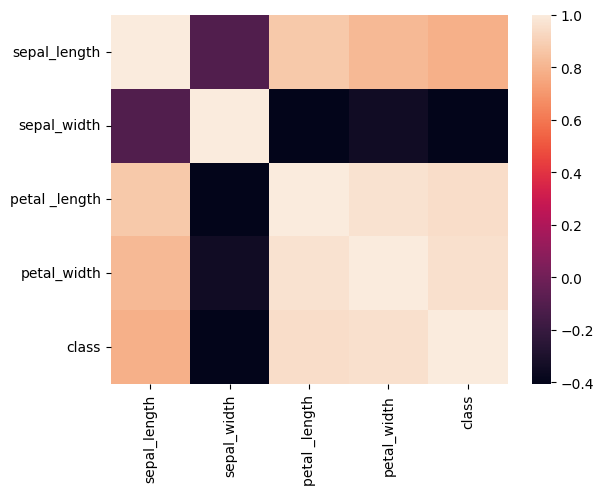

In [51]:
sns.heatmap(data.corr())

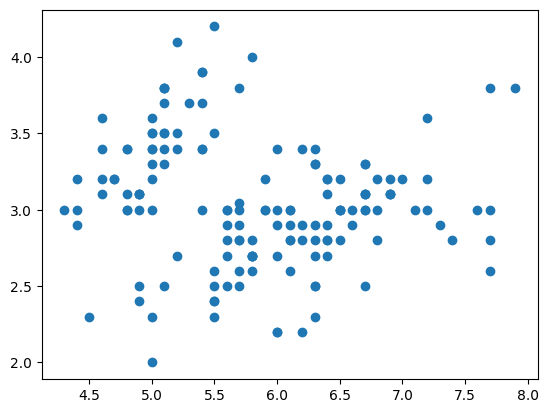

In [57]:
plt.scatter(data["sepal_length"],data["sepal_width"])

In [47]:

data["sepal_width"]=data["sepal_width"].fillna(data["sepal_width"].mean())
data.isnull().sum()

sepal_length     0
sepal_width      0
petal _length    0
petal_width      0
class            0
dtype: int64

In [48]:

from sklearn.model_selection import train_test_split

x=data.drop(["class"],axis=1)
y=data["class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)


In [50]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)